In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
%matplotlib inline

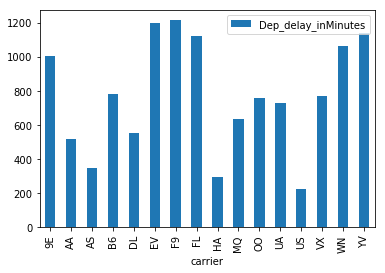

In [2]:
#Average delay (in minutes) for each airline
flight_nyc=pd.read_csv('D:/Data Science Certification/attachment_Project_1_NYC-Flight_data/Project_1_NYC-Flight data/flight_data.csv')
mean_depdelay=flight_nyc.groupby('carrier').dep_delay.mean()*60
#print(mean_depdelay)
df=pd.DataFrame(mean_depdelay)
df=df.rename(columns={'dep_delay':'Dep_delay_inMinutes'})
#print(df)
df.sort_values('Dep_delay_inMinutes' , axis=0,ascending=False)
df.plot(kind='bar')

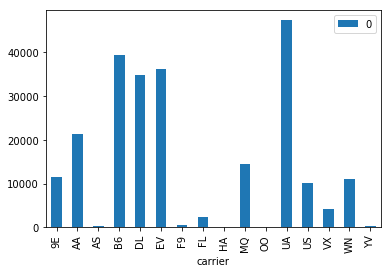

In [22]:
 #25th percentile: 25% delays <X - Sonali
groupbycarrier=flight_nyc[(flight_nyc.dep_delay > flight_nyc.dep_delay.quantile(0.25))]
groupbycarrier_df=pd.DataFrame(groupbycarrier)

delayed=groupbycarrier_df.groupby('carrier').size()
delayed_df=pd.DataFrame(delayed)
delayed_df.plot(kind='bar')





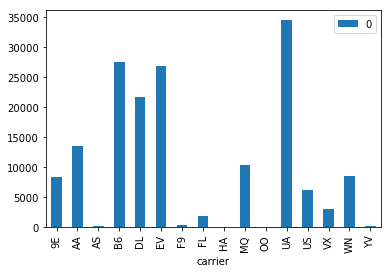

In [26]:
# 50th percentile: median - Sonali
groupbycarrier=flight_nyc[(flight_nyc.dep_delay > flight_nyc.dep_delay.quantile(0.5))]
groupbycarrier_df=pd.DataFrame(groupbycarrier)

delayed=groupbycarrier_df.groupby('carrier').size()
delayed_df=pd.DataFrame(delayed)
delayed_df.plot(kind='bar')






In [32]:
df_aircraft_distance = flight_nyc.groupby([flight_nyc.tailnum])['dep_delay'].mean().reset_index(name='dep_delay')
print (df_aircraft_distance.sort_values('dep_delay').head(10))
print (df_aircraft_distance.sort_values('dep_delay').tail(10))

     tailnum  dep_delay
3145  N785SK      -14.0
2830  N710SK      -13.0
2892  N726SK      -11.0
2797  N701SK      -11.0
3478  N859AS      -11.0
338   N17627      -10.5
193   N14628      -10.0
3166  N794SK      -10.0
2167  N583AS       -9.5
1786  N509AA       -9.0
     tailnum  dep_delay
3675  N911DA      268.0
2184  N587NW      272.0
3747  N922EV      274.0
3409  N844MH      297.0
841   N347SW        NaN
2896  N728SK        NaN
3061  N768SK        NaN
3504  N862DA        NaN
3509  N865DA        NaN
3845  N939DN        NaN


    cancelledflight  Total Flights
9E           1044.0          18460
AA            636.0          32729
AS              2.0            714
B6            466.0          54635
DL            349.0          48110
EV           2817.0          54173
F9              3.0            685
FL             73.0           3260
HA              NaN            342
MQ           1234.0          26397
OO              3.0             32
UA            686.0          58665
US            663.0          20536
VX             31.0           5162
WN            192.0          12275
YV             56.0            601


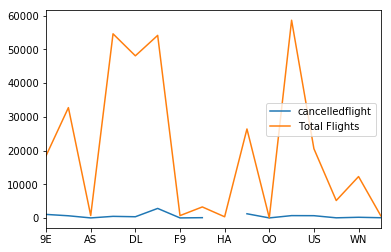

In [77]:
#Sort by the proportion of flights cancelled: complete output sorted by proportion of flights delayed by carrier (long Vs short)


cancelled_flights=flight_nyc[flight_nyc.dep_time.isnull() & flight_nyc.arr_time.isnull() & flight_nyc.air_time.isnull()]
cancelled_flights_grpby_carrier=pd.DataFrame(cancelled_flights.groupby('carrier').size())
total_flights_grpby_carrier=pd.DataFrame(flight_nyc.groupby('carrier').size())
total_flights_grpby_carrier=total_flights_grpby_carrier.rename(columns={0:'Total Flights'})
result=pd.concat([cancelled_flights_grpby_carrier,total_flights_grpby_carrier], axis=1)
result_df=pd.DataFrame(result)
result_df=result_df.rename(columns={0:'cancelledflight'})
print(result_df)

result_df.plot()
